Import libraries and packages for working on data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from wordcloud import WordCloud
import warnings

In [5]:
# warnings, numpy array output settings and nltk stop words download
warnings.filterwarnings('ignore')
np.set_printoptions(suppress = True)
%matplotlib inline

Load data.

In [6]:
data = pd.read_csv('Top_rated_movies1.csv')
display(data.head())
print(f'Data shape: {data.shape}')

,id,title,overview,popularity,release_date,vote_average,vote_count
0,168705,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,2005-10-22,4.105,501
1,19766,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,2003-03-11,4.100,342
2,248705,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,2016-03-23,4.090,636
3,17711,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,2000-06-30,4.075,335
4,580,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,1987-07-17,4.064,931


Data shape: (8831, 7)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8831 non-null   int64  
 1   title         8831 non-null   object 
 2   overview      8830 non-null   object 
 3   popularity    8831 non-null   float64
 4   release_date  8831 non-null   object 
 5   vote_average  8831 non-null   float64
 6   vote_count    8831 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 483.1+ KB


EDA part.

In data.info we saw that we have one overview missed, let's drop that row.

In [8]:
# look at that row
display(data[data.overview.isna()])
data.dropna(inplace = True)
print(f'Data shape after drop of NA values: {data.shape}')

,id,title,overview,popularity,release_date,vote_average,vote_count
8654,42436,Natale in crociera,NaN,5.888,2007-12-14,4.937,388


Data shape after drop of NA values: (8830, 7)


Let's check the most and least popular movies in the dataset.

In [9]:
display(data[data.popularity == max(data.popularity)])
display(data[data.popularity == min(data.popularity)])

,id,title,overview,popularity,release_date,vote_average,vote_count
266,872585,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1766.305,2023-07-19,8.163,4905


,id,title,overview,popularity,release_date,vote_average,vote_count
137,12477,Grave of the Fireflies,"In the final months of World War II, 14-year-o...",0.6,1988-04-15,8.454,4957
167,92321,Hotarubi no Mori e,One hot summer day a little girl gets lost in ...,0.6,2011-09-17,8.367,1006
3454,203819,Tracks,Accompanied only by her faithful dog and four ...,0.6,2013-12-19,6.916,475
8265,182219,Serial Teachers,With only 12 percent of its pupils obtaining t...,0.6,2013-04-17,5.460,1159


Oppenheimer is most popular movie in dataset, I am not surprised)

Check the movies with highest and lowest ratings.

In [10]:
display(data[data.vote_average == max(data.vote_average)])
display(data[data.vote_average == min(data.vote_average)])

,id,title,overview,popularity,release_date,vote_average,vote_count
120,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",167.536,1972-03-14,8.708,18991


,id,title,overview,popularity,release_date,vote_average,vote_count
8830,40016,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,13.853,2010-02-27,2.106,306


Check the oldest and newest movies in this dataset.

In [11]:
display(data[data.release_date == min(data.release_date)])
display(data[data.release_date == max(data.release_date)])

,id,title,overview,popularity,release_date,vote_average,vote_count
459,775,A Trip to the Moon,Professor Barbenfouillis and five of his colle...,25.615,1902-04-17,7.9,1607


,id,title,overview,popularity,release_date,vote_average,vote_count
119,1059377,Srimulat: Hidup Memang Komedi,"After Gepeng's indiscipline, Srimulat's life i...",11.038,2023-11-23,4.0,1


As I did not found any information about overviews languages on Kaggle, let's check it out now!

In [12]:
def detect_language(text):
    try:
        return detect(text) if text.strip() else np.nan
    except Exception:
        pass

lang = data.overview.apply(detect_language)
print(lang.value_counts())

overview
en    8830
Name: count, dtype: int64


Majority overviews are in English and one in Danish.Let's make plot of words with WordCloud, to see, which words are most frequent.

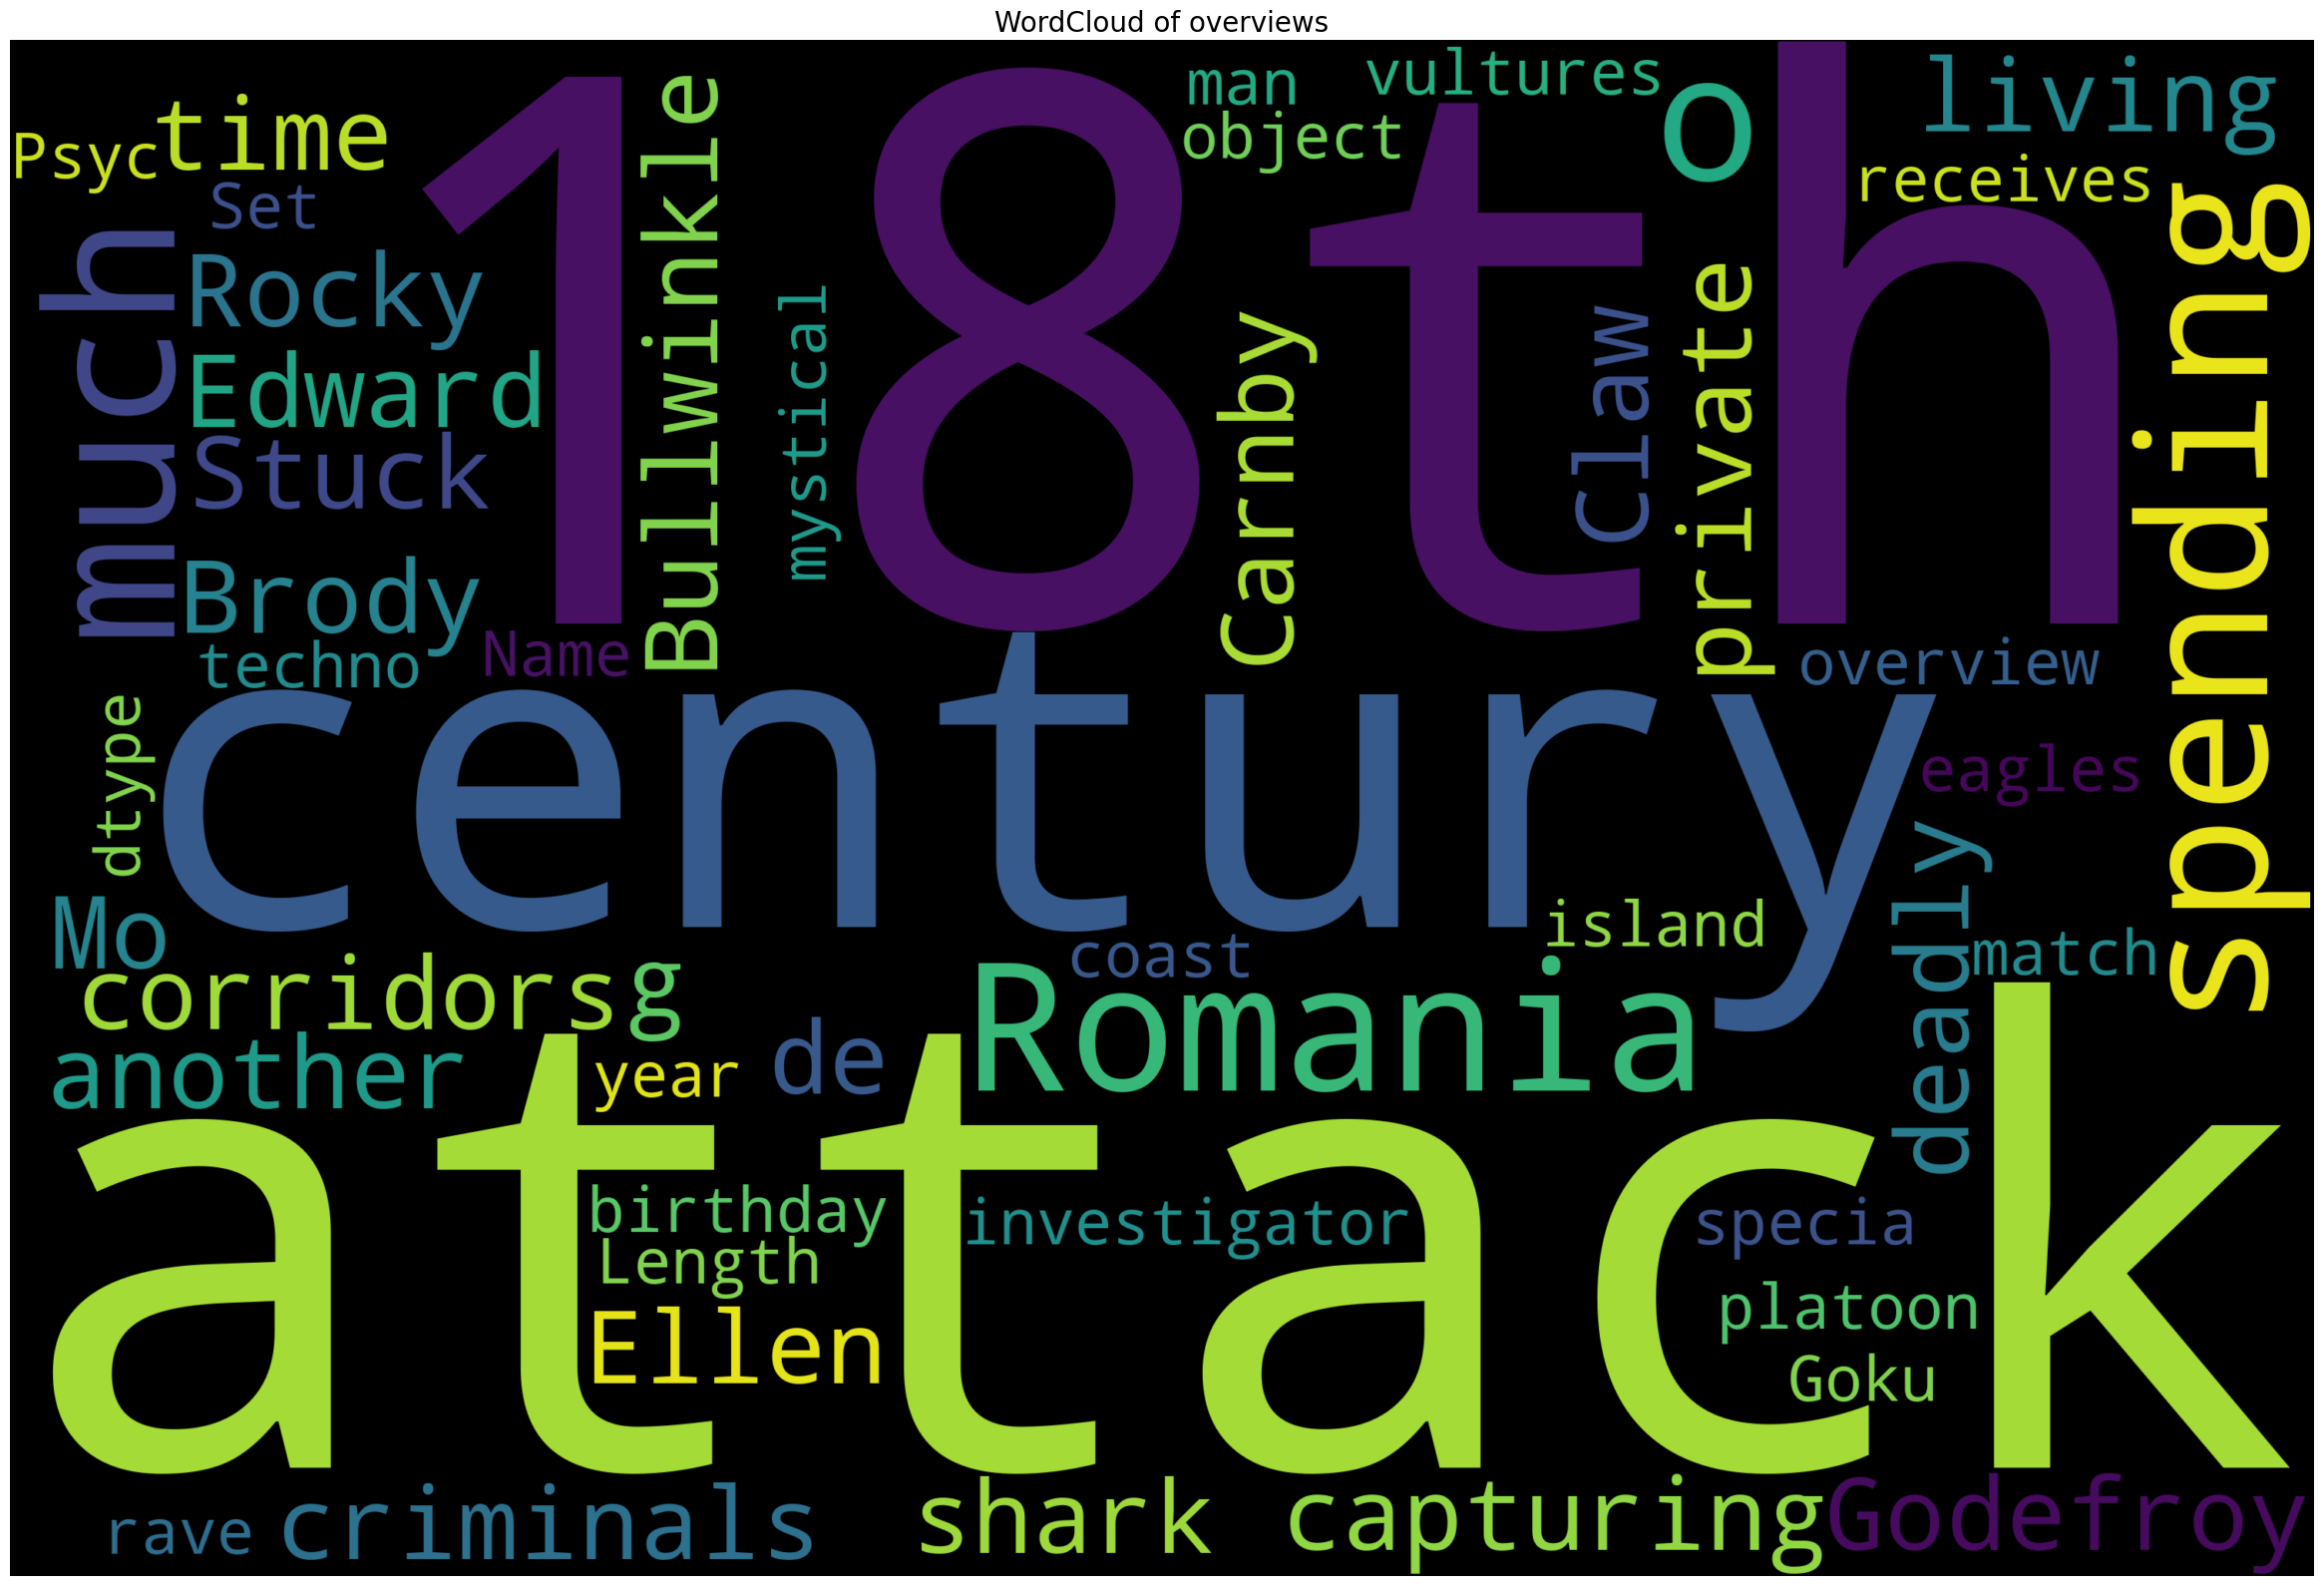

In [13]:
plt.figure(figsize = (30,20))
wordcloud_plot = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(str(data.overview))
plt.imshow(wordcloud_plot, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud of overviews', fontsize = 20)
plt.show();

Looking to numeric columns in data.

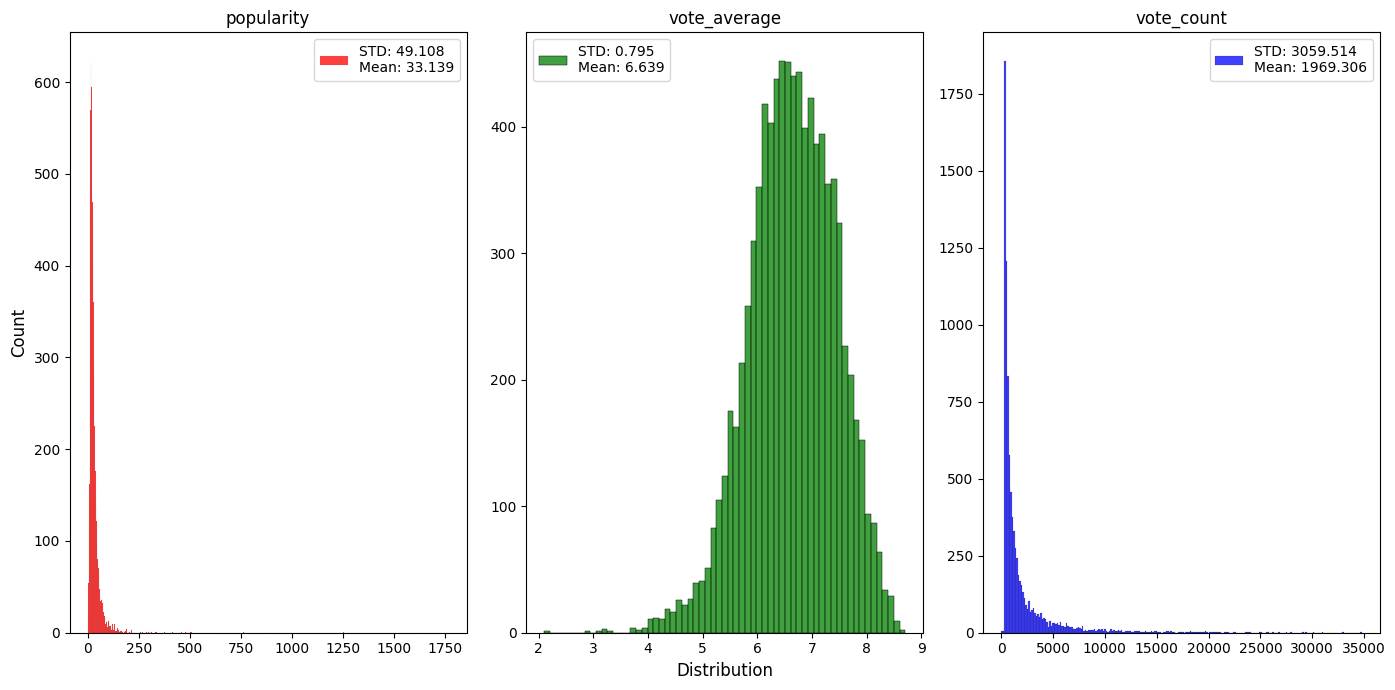

In [14]:
num_columns = [col for col in data.columns if np.dtype(data[col]) != 'O'][1:]

def hists(cols = num_columns):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,7))
    colors = ['red', 'green', 'blue']

    for ax_i, col in enumerate(cols):
        sns.histplot(data = data, x = data[col], ax = axes[ax_i], color = colors[ax_i],
                     label = f'STD: {round(np.std(data[col]), 3)}\nMean: {round(np.mean(data[col]), 3)}')
        
        axes[ax_i].set_xlabel('')
        if ax_i % 2 == 1:
            axes[ax_i].set_xlabel('Distribution', fontsize = 12)
        axes[ax_i].set_ylabel('')
        if ax_i == 0:
            axes[ax_i].set_ylabel('Count', fontsize = 12)
        
        axes[ax_i].set_title(col)
        axes[ax_i].legend()
    
    plt.tight_layout()
    plt.show();

hists()

Groupby by years to see stats over them.

In [15]:
data['release_year'] = data.release_date.apply(lambda x: x.split('-')[0]) # apply on release date
data.release_year = data.release_year.astype(int) # making years int dtype
# function for plotting grouped results(mean and median)
def grouped_plots(data: pd.DataFrame, name: str):
    plt.figure(figsize = (15,6))
    sns.lineplot(data = data, x = data.index, y = 'mean', color = 'black', lw = 2, label = 'Average by years')
    sns.lineplot(data = data, x = data.index, y = 'median', color = 'yellow', lw = 2, label = 'Median by years')
    plt.legend()
    plt.title(f'{name} by years')
    plt.show();

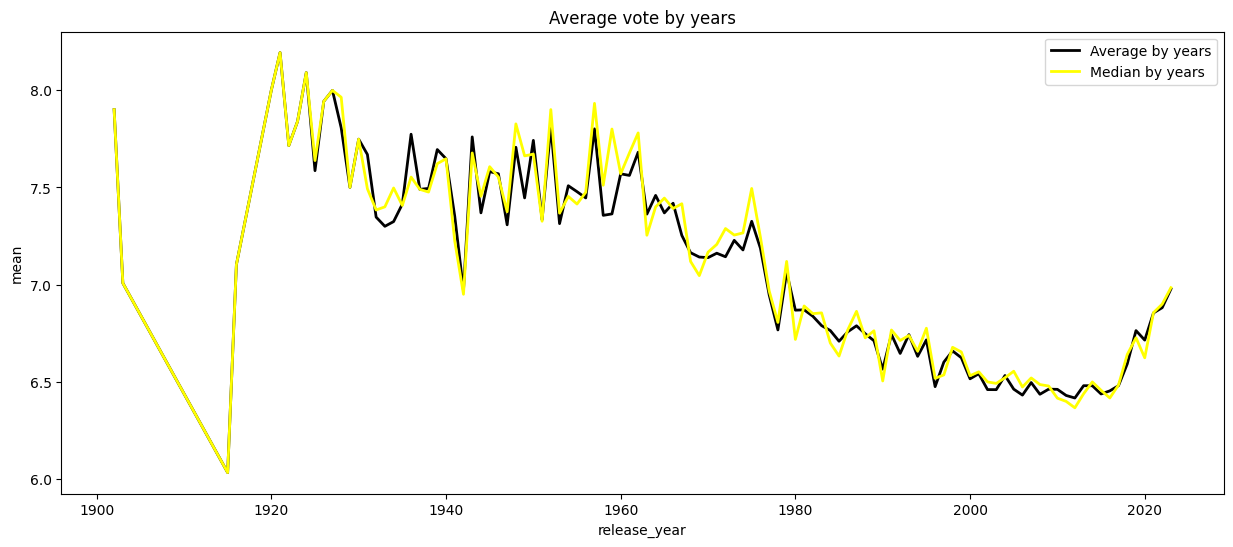

In [16]:
# vote average grouped by years
vote_avg_gr = data.vote_average.groupby(by = data.release_year).aggregate([np.mean, np.median])
grouped_plots(vote_avg_gr, 'Average vote')

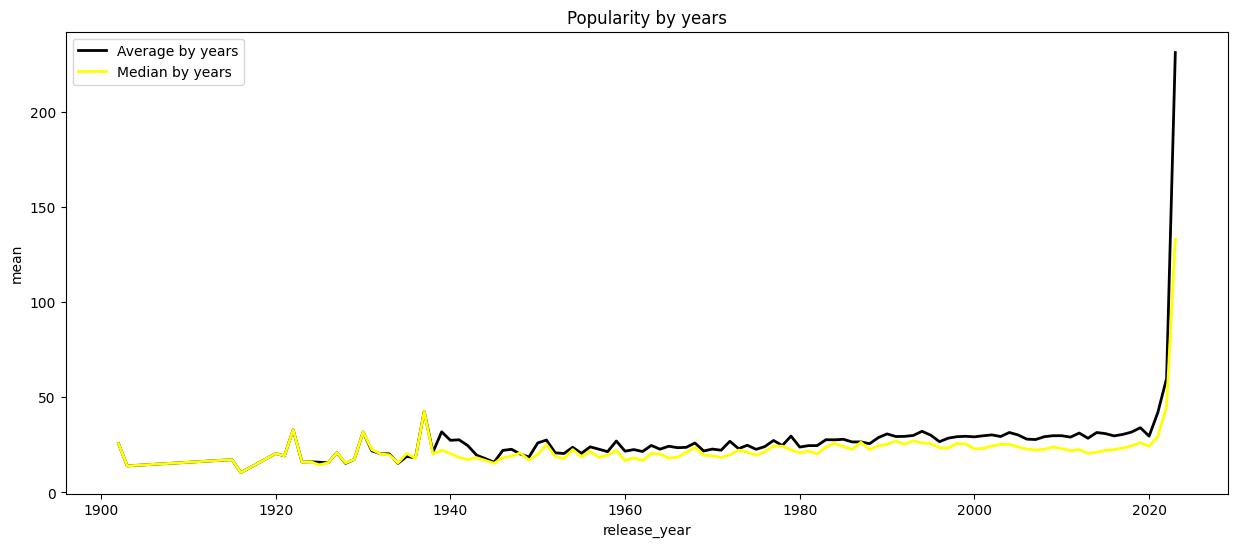

In [17]:
# popularity grouped by years
pop_gr = data.popularity.groupby(by = data.release_year).aggregate([np.mean, np.median])
grouped_plots(pop_gr, 'Popularity')

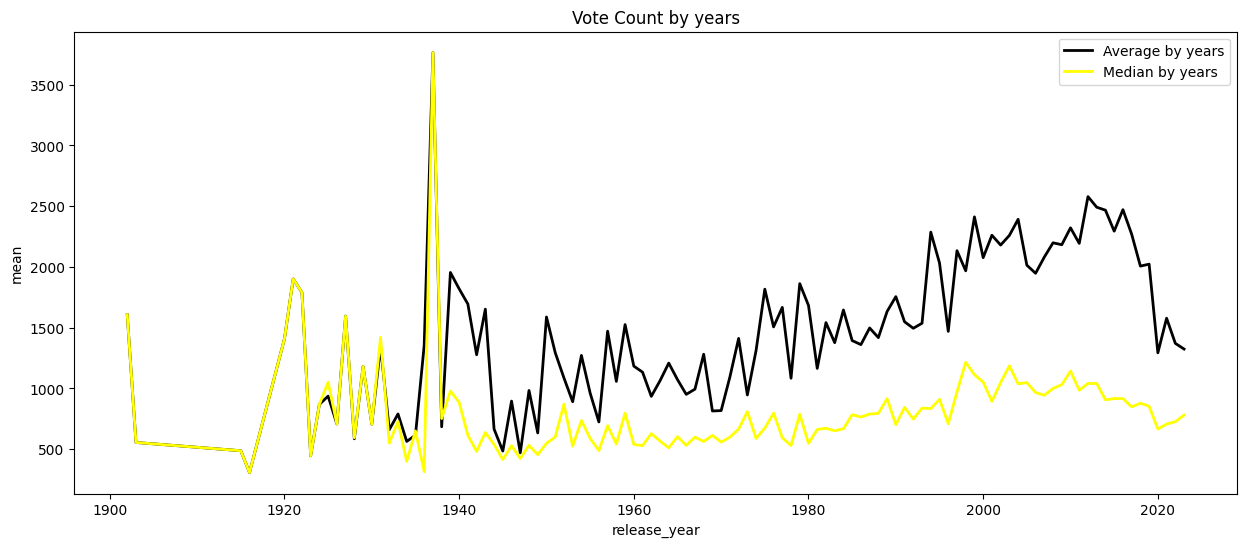

In [18]:
# vote count grouped by years
vote_count_gr = data.vote_count.groupby(by = data.release_year).aggregate([np.mean, np.median])
grouped_plots(vote_count_gr, 'Vote Count')

Let's look at correlation matrix and jointplots to see relations between numeric values.

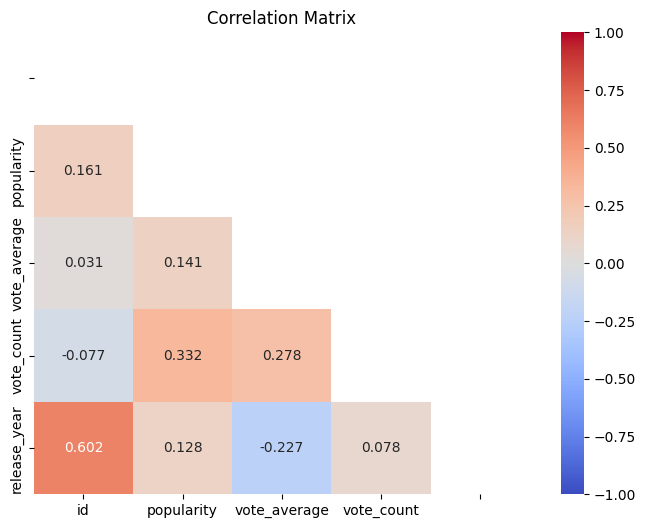

In [19]:
# correlation matrix
plt.figure(figsize = (8,6))
corr_matrix = sns.heatmap(data = data.corr(numeric_only = True), annot = True, fmt = '.3f', cmap = 'coolwarm', 
            mask = np.triu(np.ones_like(data.corr(numeric_only = True))), vmin = -1, vmax = 1)

# getting xticks
xtick_labels = [label.get_text() for label in corr_matrix.get_xticklabels()]
xtick_labels[-1] = None
corr_matrix.set_xticklabels(xtick_labels)
# getting yticks
ytick_labels = [label.get_text() for label in corr_matrix.get_yticklabels()]
ytick_labels[0] = None
corr_matrix.set_yticklabels(ytick_labels)

plt.title('Correlation Matrix')
plt.show();

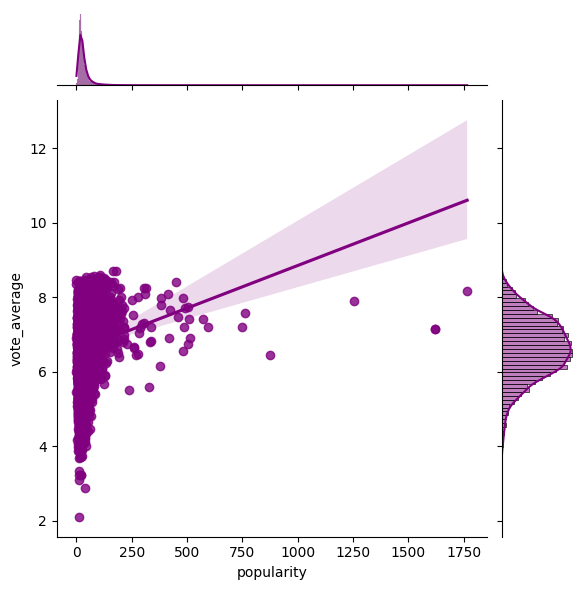

In [20]:
# looking at relationships with jointplots
sns.jointplot(data = data, x = 'popularity', y = 'vote_average', kind = 'reg', color = 'purple');

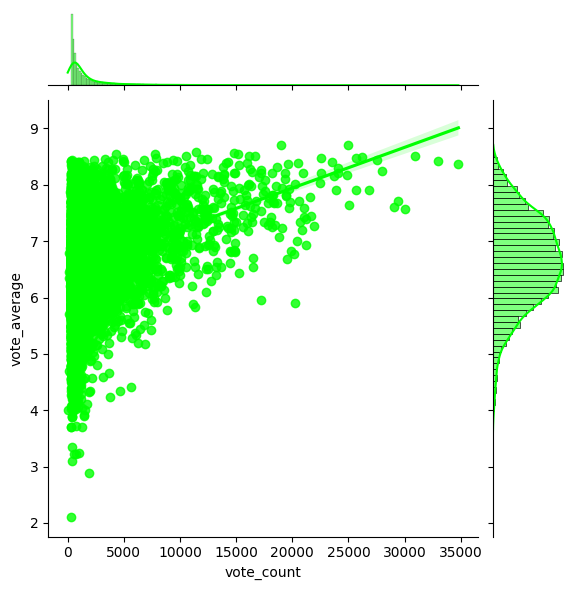

In [21]:
sns.jointplot(data = data, x = 'vote_count', y = 'vote_average', kind = 'reg', color = 'lime');